<h1>Анализ товарного ассортимента<span class="tocSkip"></span></h1>

### Описание данных

Интернет-магазин предоставил данные, которые описывают транзакции интернет-магазина товаров для дома и быта «Пока все ещё тут».

- `date` — дата заказа;
- `customer_id` — идентификатор покупателя;
- `order_id` — идентификатор заказа;
- `product` — наименование товара;
- `quantity` — количество товара в заказе;
- `price` — цена товара.

## Обзор данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re 
import warnings
warnings.filterwarnings('ignore')

from datetime import date, datetime, time, timedelta
from pymystem3 import Mystem
from scipy import stats
from nltk.stem.snowball import SnowballStemmer
from sklearn.preprocessing import StandardScaler
from scipy import stats as st  
from scipy.cluster.hierarchy import dendrogram, linkage

Ознакомимся с предоставленными данным:

In [2]:
try:
    df = pd.read_csv('/datasets/ecommerce_dataset.csv') #серверный путь
except:
     df = pd.read_csv('C:/Users/User/Desktop/ecommerce_dataset.csv') #локальный путь

### Проверка типа данных в столбцах 

In [3]:
display(df.head())
display(df.info())
df.describe()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


None

,date,order_id,quantity,price
count,6.737000e+03,6737.000000,6737.000000,6737.000000
mean,2.018855e+09,43128.948345,2.501559,462.028499
std,3.855185e+05,27899.414662,15.266478,871.296064
min,2.018100e+09,12624.000000,1.000000,9.000000
25%,2.019020e+09,14827.000000,1.000000,101.000000
50%,2.019050e+09,68503.000000,1.000000,135.000000
75%,2.019061e+09,70504.000000,1.000000,398.000000
max,2.019103e+09,73164.000000,1000.000000,14917.000000


#### Выводы:

1. В данных представлены сведения о заказах пользователей:
* date — дата заказа;
* customer_id — идентификатор покупателя;
* order_id — идентификатор заказа;
* product — наименование товара;
* quantity — количество товара в заказе;
* price — цена товара.

2. В таблице 6737 строчек и 6 колонок
3. Одна строчка соотвествует одной заказанной позиции от одного покупателя
4. В столбце `date`, где указана дата заказа- тип данных `int64`, вместо `datetime`
5. Минимальное количество товара в заказе-1, максимальное количество товара в заказаке-1000
6. Минимальная цена товара-9 денежных едениц, максимальная цена товара-14.917 денежных едениц



### Проверка данных на пропуски 

Проверим таблицу на наличие пропущенных значений

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         6737 non-null   int64  
 1   customer_id  6737 non-null   object 
 2   order_id     6737 non-null   int64  
 3   product      6737 non-null   object 
 4   quantity     6737 non-null   int64  
 5   price        6737 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 315.9+ KB


#### Выводы:

В таблице нет пропущенных значений	


## Предобработка данных

### Исправление типов данных 

Исправим тип данных в столбце `date`, где указана дата заказа- тип данных `int64`, вместо `datetime`:

In [5]:
df['date_new'] = pd.to_datetime(df['date'],format='%Y%m%d%H') #изменяем тип данных
display(df.head())
df.info()

,date,customer_id,order_id,product,quantity,price,date_new
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   int64         
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
 6   date_new     6737 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 368.6+ KB


#### Вывод:

Тип данных в столбце изменен.

### Выделение месяца и часов в отдельный столбец 

Создадим столбец, в котором будет только месяц:

In [6]:
df['month_year'] = df['date_new'].astype('datetime64[M]') #создаем столбец только с месяцем
display(df.head())
df.info()

,date,customer_id,order_id,product,quantity,price,date_new,month_year
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018-10-01
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6737 entries, 0 to 6736
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         6737 non-null   int64         
 1   customer_id  6737 non-null   object        
 2   order_id     6737 non-null   int64         
 3   product      6737 non-null   object        
 4   quantity     6737 non-null   int64         
 5   price        6737 non-null   float64       
 6   date_new     6737 non-null   datetime64[ns]
 7   month_year   6737 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(3), object(2)
memory usage: 421.2+ KB


Создадим столбец, в котором будут только часы:

In [7]:
df['hours'] = pd.to_datetime(df['date'],format='%Y%m%d%H').dt.hour #создаем столбец только с часами
df.head()

,date,customer_id,order_id,product,quantity,price,date_new,month_year,hours
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01,0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018-10-01,0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,0


#### Вывод:

Добавили отдельные столбцы с месяцем и часами.

### Проверка данных на дубликаты

Проверим данные на дубликаты

In [8]:
df[df.duplicated()] #проверка на явные дубликаты

,date,customer_id,order_id,product,quantity,price,date_new,month_year,hours


Полных дубликатов в таблице нет. 


Проверим таблицу на наличие дубликатов без столбца `date`, так как в столбце указаны данные в формате `int`, это может помешать найти существующие дубликаты

In [9]:
#новая таблица, без столбца с датой 
new_df = df[[ 'customer_id','order_id', 'product',  'quantity','price', 'month_year',  'hours']]
new_df

,customer_id,order_id,product,quantity,price,month_year,hours
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0
...,...,...,...,...,...,...,...
6732,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73156,"Таз пластмассовый 40,0 л пищевой овальный (Иж)...",1,404.0,2019-10-01,11
6733,1f0a7f35-7459-4f23-b468-5e45bf481dd1,73158,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1087.0,2019-10-01,12
6734,25df96a7-c453-4708-9cea-a3dfc7c342ea,73162,Герань домашняя (пеларгония зональная) цветуща...,1,157.0,2019-10-01,13
6735,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,73164,"Таз пластмассовый со стиральной доской (Иж), 1...",1,397.0,2019-10-01,14


In [10]:
#поиск дубликатов в таблице без столбца с датой
new_df[new_df.duplicated()]

,customer_id,order_id,product,quantity,price,month_year,hours
1130,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,20
1133,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,18
1138,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,14
1143,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,20
1206,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,18
...,...,...,...,...,...,...,...
6247,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-09-01,9
6290,254cea58-53b6-4adf-bba3-9b6074797240,72518,Щетка универсальная с телескопической ручкой D...,1,1612.0,2019-09-01,9
6358,eeb70bfd-1bbc-44b7-92b7-ee556c2607bb,72683,"Таз пластмассовый 8,0 л пищевой (Минеральные в...",1,127.0,2019-09-01,10
6647,7f76ce2d-fb60-471f-8820-53ad6197caaa,73002,Эвкалипт Гунни d-14 см h-70 см,2,524.0,2019-10-01,7


По таблице видно, что некоторые заказы полностью дублируются, вплоть до времени заказа. Посмотрим на один из таких заказов.

In [11]:
new_df[new_df['order_id'] == 69162]

,customer_id,order_id,product,quantity,price,month_year,hours
1043,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,12
1045,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,18
1046,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,20
1047,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,22
1054,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,14
1091,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,19
1130,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,20
1133,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,18
1135,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,21
1136,8c290149-ad54-4d7a-87a7-9386b36390ee,69162,Термометр на окно уличный на липучках Т-5 h-20...,2,44.0,2018-12-01,13


In [12]:
new_df[new_df['order_id'] == 70960]

,customer_id,order_id,product,quantity,price,month_year,hours
2589,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,16
2600,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,10
2622,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,8
2718,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,15
2734,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,9
2762,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,19
2815,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,22
2820,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,21
2845,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,17
2854,57cc80a2-2610-4eef-9457-e7c3bf0c72f0,70960,Сумка-тележка 2-х колесная Gimi Argo красная,1,1087.0,2019-04-01,10


Есть несколько вариантов возникновения такого количества дубликатов:
* покупатель оптовик (но тогда почему не оформить все товары в один заказ?)
* на сайте возникла техническая ошибка и пользователю приходилось несколько раз оформлять заказ (но тогла почему все заказы оплачены?)
* покупатель целенаправленно покупал термометры (напрмер, для перепродажи, для использования на разных объектах, но почему тогда не оформить все товары в одном заказе?)
* это полные дубликаты, и для более достоверных результатов, их необходимо удалить, кроме первого вхождения

Расчитаем количество и долю дубликатов, кроме первого вхождения

In [13]:
duplicates_not_first = len(new_df[new_df.duplicated(keep= 'first')])
f'Количество дубликатов в данных, кроме первого вхождения: {duplicates_not_first}'

'Количество дубликатов в данных, кроме первого вхождения: 738'

In [14]:
share_duplicates_not_first = (duplicates_not_first/len(df))*100
f'Доля дубликатов в данных, кроме первого вхождения: {share_duplicates_not_first} %'

'Доля дубликатов в данных, кроме первого вхождения: 10.954430755529167 %'

Расчитаем количество и долю всех дубликатов:

In [15]:
duplicates = len(new_df[new_df.duplicated(keep= False)])
f'Количество всех  дубликатов в данных: {duplicates}'

'Количество всех  дубликатов в данных: 1004'

In [16]:
share_duplicates = (duplicates/len(df))*100
f'Доля дубликатов в данных, кроме первого вхождения: {share_duplicates} %'

'Доля дубликатов в данных, кроме первого вхождения: 14.902775716194153 %'

Удалив дубликаты, кроме первого вхождения, мы оставляем заказы, которые пользователь мог продублировать из-за того, что ему очень понравился товар.

In [17]:
df_without_duplicates = new_df.drop_duplicates(keep='first').reset_index(drop=True)
display(df_without_duplicates.info())
df_without_duplicates.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5999 entries, 0 to 5998
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  5999 non-null   object        
 1   order_id     5999 non-null   int64         
 2   product      5999 non-null   object        
 3   quantity     5999 non-null   int64         
 4   price        5999 non-null   float64       
 5   month_year   5999 non-null   datetime64[ns]
 6   hours        5999 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 328.2+ KB


None

,customer_id,order_id,product,quantity,price,month_year,hours
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,0
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,0
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,0
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,0
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,0


Дубликаты удалены.

#### Выводы: 

1. В таблице нет полных дубликатов
2. В таблице имеются дубликаты по `customer_id` и `по order_id`, так как один пользователь мог заказать за одно посещение интеренет магазина несколько товаров в одном заказе, а в таблице эти заказы указаны по отдельности, удалять данные дубликаты не надо.
3. В таблице имеются неполные дубликаты, их доля- 10% (738): один пользователь, в один и тот же день, заказала один и тот же товар, несолько раз, с одним номером заказа, одинаковое количество, но в разное время суток. 


Во многих интернет-магазинах, есть функция-"продублировать заказ": в таком случае происходит полное дублирование заказа, с тем же содержимым, но разным номером заказа. Но может быть, на в данном интернет магазине при клике на "повторить заказ", дублируется и номер заказа. Заказы отличаются только временем заказа. 

Однако заказ действительно может дублироваться, так как один пользователь может решиться на повторный заказ  чеерез несколько часов. Поэтому удалим дубликаты, кроме первого вхождения.

Так же, следует отметить, что доля дубликатов, кроме первого вхождения-10% (доля всех дубликатов-14 %)

### Работа с дубликатами

Ознакокимся с содержимым столбца `product`

In [18]:
list(df_without_duplicates['product'].unique())

['Комнатное растение в горшке Алое Вера, d12, h30',
 'Комнатное растение в горшке Кофе Арабика, d12, h25',
 'Радермахера d-12 см h-20 см',
 'Хризолидокарпус Лутесценс d-9 см',
 'Циперус Зумула d-12 см h-25 см',
 'Шеффлера Лузеана d-9 см',
 'Юкка нитчатая d-12 см h-25-35 см',
 'Настенная сушилка для белья Gimi Brio Super 100',
 'Таз пластмассовый 21,0 л круглый "Водолей" С614, 1404056',
 'Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379',
 'Вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, Attribute, AHS331',
 'Сушилка для белья потолочная Zalger Lift Basic 1520 200 см, 10 м',
 'Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42',
 'Крючок одежный 2-х рожковый серый металлик с полимерным покрытием *Тонар*, 1110027',
 'Корзина мягкая пластиковая 17 л, М-пластика, M2880',
 'Мини-сковорода Marmiton "Сердце" с антипригарным покрытием 12 см, LG17085',
 'Сковорода алюминиевая с антипригарным покрытием MARBLE ALPENKOK d = 26 см AK-003

In [19]:
prod = len(df_without_duplicates['product'].unique())
f'Количество товаров в ассортименте: {prod}'

'Количество товаров в ассортименте: 2343'

Количество товаров в ассортименте - 2343. Но по списку видно, что в данном столбце представлены неявные дубликаты. 

Для дальнейшей работой со столбцом `product` и проведения категоризации - необходимо предобработать его, а именно:

* Изменение регистра(приведение к нижнему регистру)
* Замена ё на е
* Удаление пробелов
* Удаление цифр 
* Удаление не буквенных символов

Все это необходимо сделать для того, что бы сделать схожие позиции в ассортименте более "однородными".

In [20]:
df_without_duplicates['product'] = df_without_duplicates['product'].str.lower() #приведение к нижнему регистру
df.head(5)

,date,customer_id,order_id,product,quantity,price,date_new,month_year,hours
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,2018-10-01,2018-10-01,0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0,2018-10-01,2018-10-01,0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,2018-10-01,2018-10-01,0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,2018-10-01,2018-10-01,0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,2018-10-01,2018-10-01,0


Товары в таблице приведены к нижнему регистру. Заменим букву ё на букву е.

In [21]:
df_without_duplicates['product'] = df_without_duplicates['product'].replace('ё', 'е')

Замена произведена, далее напишем регулярное выражение, что бы получить только символы из названия товаров (без цифр, без знаков).

In [22]:
#используем регулярное выражение, что бы получить навзания товаров
df_without_duplicates['new_product'] = df_without_duplicates['product'].str.extract(r'([a-я]+)', expand=True) 
df_without_duplicates.head(15)

,customer_id,order_id,product,quantity,price,month_year,hours,new_product
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,0,комнатное
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,0,комнатное
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,радермахера
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,0,хризолидокарпус
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,0,циперус
5,ee47d746-6d2f-4d3c-9622-c31412542920,68477,шеффлера лузеана d-9 см,1,164.0,2018-10-01,0,шеффлера
6,ee47d746-6d2f-4d3c-9622-c31412542920,68477,юкка нитчатая d-12 см h-25-35 см,1,134.0,2018-10-01,0,юкка
7,375e0724-f033-4c76-b579-84969cf38ee2,68479,настенная сушилка для белья gimi brio super 100,1,824.0,2018-10-01,8,настенная
8,6644e5b4-9934-4863-9778-aaa125207701,68478,"таз пластмассовый 21,0 л круглый ""водолей"" с61...",1,269.0,2018-10-01,8,таз
9,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,чехол для гладильной доски colombo persia beig...,1,674.0,2018-10-01,9,чехол


In [23]:
list(df_without_duplicates['product'].unique())

['комнатное растение в горшке алое вера, d12, h30',
 'комнатное растение в горшке кофе арабика, d12, h25',
 'радермахера d-12 см h-20 см',
 'хризолидокарпус лутесценс d-9 см',
 'циперус зумула d-12 см h-25 см',
 'шеффлера лузеана d-9 см',
 'юкка нитчатая d-12 см h-25-35 см',
 'настенная сушилка для белья gimi brio super 100',
 'таз пластмассовый 21,0 л круглый "водолей" с614, 1404056',
 'чехол для гладильной доски colombo persia beige 130х50 см из хлопка 5379',
 'вешалка для брюк металлическая с резиновым покрытием 26 см цвет: синяя, attribute, ahs331',
 'сушилка для белья потолочная zalger lift basic 1520 200 см, 10 м',
 'чехол eurogold clean basic хлопок для досок 120х38-120х42 см c42',
 'крючок одежный 2-х рожковый серый металлик с полимерным покрытием *тонар*, 1110027',
 'корзина мягкая пластиковая 17 л, м-пластика, m2880',
 'мини-сковорода marmiton "сердце" с антипригарным покрытием 12 см, lg17085',
 'сковорода алюминиевая с антипригарным покрытием marble alpenkok d = 26 см ak-003

In [24]:
prod_new = len(df_without_duplicates['product'].unique())
f'Количество товаров в ассортименте после обработки неявынх дубликатов: {prod_new}'

'Количество товаров в ассортименте после обработки неявынх дубликатов: 2341'

#### Вывод:

Таким образом, после обработки дубликатов, нам удалось сделать ассортимент более "однородным" (из 2343 наименований до 443 ) , что в дальнейшем  поможет нам провести категоризацию товаров. 

### Кластаризация


In [25]:
for_claster = df_without_duplicates[['order_id', 'quantity', 'hours', 'price']].astype(float)
for_claster

,order_id,quantity,hours,price
0,68477.0,1.0,0.0,142.0
1,68477.0,1.0,0.0,194.0
2,68477.0,1.0,0.0,112.0
3,68477.0,1.0,0.0,179.0
4,68477.0,1.0,0.0,112.0
...,...,...,...,...
5994,73156.0,1.0,11.0,404.0
5995,73158.0,1.0,12.0,1087.0
5996,73162.0,1.0,13.0,157.0
5997,73164.0,1.0,14.0,397.0


In [26]:
#выделяем данные
X = for_claster

In [27]:
#стандартизируем данные
scaler = StandardScaler()
X_sc = scaler.fit_transform(X)

In [28]:
#построим матрицу расстояний функцией на стандартизованной матрице признаков
linked = linkage(X_sc, method = 'ward') 
linked

array([[1.17000000e+02, 1.18000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 4.00000000e+00, 0.00000000e+00, 2.00000000e+00],
       [2.83000000e+02, 2.84000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [1.19880000e+04, 1.19930000e+04, 7.89743155e+01, 3.36100000e+03],
       [4.78500000e+03, 1.19940000e+04, 8.71790952e+01, 3.36200000e+03],
       [1.19920000e+04, 1.19950000e+04, 1.16941876e+02, 5.99900000e+03]])

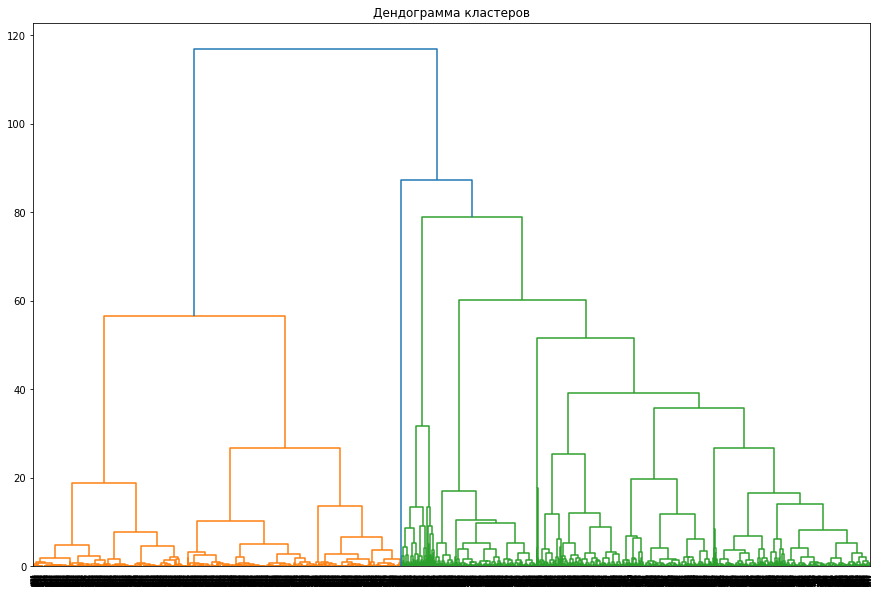

In [29]:
#строим дендограмму
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Дендограмма кластеров')
plt.show()

#### Вывод:

По дендограмме видно, что кластеров должно быть около 7. Распределим все товары по 7 категориям

### Категоризация столбца `product`

Для дальнейшего анализа, распределим товары из ассортимента по категориям.

In [30]:
list(df_without_duplicates['new_product'].unique())

['комнатное',
 'радермахера',
 'хризолидокарпус',
 'циперус',
 'шеффлера',
 'юкка',
 'настенная',
 'таз',
 'чехол',
 'вешалка',
 'сушилка',
 'крючок',
 'корзина',
 'мини',
 'сковорода',
 'стеклянная',
 'доска',
 'сумка',
 'многолетнее',
 'рассада',
 'муляж',
 'щетка',
 'тарелка',
 'вилка',
 'ложка',
 'нож',
 'герань',
 'ерш',
 'пеларгония',
 'котел',
 'суккулент',
 'эхеверия',
 'набор',
 'коврик',
 'подкладка',
 'дозатор',
 'рш',
 'эвкалипт',
 'цветок',
 'мусорный',
 'плед',
 'скатерть',
 'кувшин',
 'адиантум',
 'ковер',
 'перчатки',
 'стремянка',
 'гладильная',
 'лестница',
 'толкушка',
 'тележка',
 'готовая',
 'искусственный',
 'простыня',
 'чайник',
 'штора',
 'банка',
 'стяжка',
 'комплект',
 'кампанула',
 'декоративная',
 'противень',
 'калатея',
 'нолина',
 'плечики',
 'подушка',
 'полотенце',
 'хлорофитум',
 'цикламен',
 'крепеж',
 'пружина',
 'глоксиния',
 'азалия',
 'гортензия',
 'хризантема',
 'петля',
 'салфетка',
 'вкладыши',
 'миксер',
 'кофр',
 'стиральный',
 'чистящий',


Разделим весь ассортимент на 7 категорий:
* кухня
* сад
* ванная
* гардероб
* дом
* текстиль
* бытовая химия


Составим для кажой категории список, где укажем название товаров, относящихся к этой категории:

In [31]:
kitchens = ['мини', 'сковорода', 'стеклянная','тарелка', 'вилка', 'ложка', 'нож', 'котел','подкладка',  'набор', 
             'соковарка', 'пьезозажигалка с', 'соковыжималка', 'стакан', 'сахарница', 'противень', 'банка',  
               'хлебница', 'миска',  'шприц', 'отделитель', 'ваза', 'кастрюля',  'сотейник',  'бидон',
            'скребок', 'сотейник', 'блюдо',  'тортница',  'венчик', 'сито', 'скалка', 'форма', 'орехоколка', 'нетканые',
            'просеиватель', 'модульная', 'емкость', 'разделочная','бульонница', 'блюдце','столовый', 'фарфоровая',
            'термокружка', 'термос', 'защитный', 'пресс',  'термостакан', 'рассекатель', 'жестяная', 'мерный',
            'салатник', 'рш', 'кипятильник',  'половник',  'кружка',  'универсальный',  'терка', 'тка',
            'картофелемялка', 'кисточка',  'ковш', 'кухонные', 'измельчитель', 'мантоварка', 'губка', 'лоток', 'чайная',
            'овощечистка', 'столовая', 'рыбочистка', 'лопатка', 'салфетница', 'чайный', 'сервировочная', 'чайник', 
            'масленка', 'ножеточка', 'салфетка', 'вкладыши','кувшин', 'толкушка','щетка', 'tepмокружка', 
           'контейнер', 'ящик', 'мусорный',  'крышка', 'электроштопор',   'овощеварка', 'миксер']

gardens = ['комнатное', 'радермахера', 'хризолидокарпус', 'циперус', 'шеффлера','юкка', 'многолетнее', 
          'герань', 'пеларгония', 'суккулент', 'эхеверия', 'эвкалипт', 'литопс', 'лавр', 'рассада','фуксия',
          'пахира','хризантема',  'эхеверия', 'петрушка', 'салат',  'диффенбахия', 'роза', 'розмарин', 
          'амариллис', 'замиокулькас', 'спатифиллум', 'фиалка', 'импатиенс', 'клен', 'хамедорея',  'зверобой',
          'цикламен', 'вигна',  'кабачок', 'огурец', 'тыква', 'мединилла',  'анемона',  'буддлея', 
          'валериана', 'змееголовник', 'капуста', 'любисток', 'монарда',  'сельдерей', 'пряные', 'аквилегия', 
          'алиссум', 'астра', 'бузульник', 'камнеломка', 'солидаго', 'физостегия', 'патиссон', 'бадан', 'камнеломка', 
          'колокольчик', 'лен', 'табак', 'шалфей', 'лантана','папоротник', 'платикодон', 'энотера' 
           'искусственный',  'лаватера',  'фатсия',  'лапчатка', 'седум', 'барвинок', 'осина', 'молодило', 
          'сциндапсус', 'пеларгония', 'гайлардия', 'монарда', 'нивянник',  'клубника', 'рудбекия','маттиола',  
          'кориандр стимул', 'сальвия', 'лук', 'джункус', 'драцена', 'арбуз', 'фатсия', 'хоста', 
          'томат', 'аргирантерум', 'левкой', 'петуния', 'вероника', 'целозия',  'примула', 'баклажан', 'дыня', 
          'кореопсис', 'портулак', 'эвкалипт', 'мускари', 'пиретрум', 'флокс', 'агератум',
          'колеус', 'тагетис','цинерания', 'лобелия рассада', 'муррайя', 'вербена',  'пеларгония', 'цитрофортунелла', 
           'пеперомия', 'гортензия', 'синнингия', 'гардения', 'томата', 
          'бальзамин', 'земляника', 'календула', 'цинния', 'базилик', 'настурция', 'гвоздика', 'девичий',
          'бегония', 'лаванда', 'виола', 'лилейник', 'папоротник', 'подвесное', 'циния', 'ясколка', 'георгина',
           'смолевка', 'вербейник', 'котовник', 'эхинацея','овсянница', 'газания',  'чабер', 'бакопа', 'ранункулус',
           'однолетнее', 'калибрахоа', 'эпипремнум', 'горох', 'незабудка', 'укроп', 'нефролепис', 'калла', 'декабрист',
          'тюльпан', 'штангенциркуль', 'гиацинт', 'подарочный',  'крокусы', 'гипсофила', 'новогоднее',
           'гиностемма', 'ель', 'кипарисовик', 'аптения', 'пуансеттия', 'скиммия', 'фиттония','тимьян', 'алоэ', 
           'фикус', 'искусственная', 'кодонанта', 'гимнокалициум', 'кофе', 'эхинокактус',  'подсолнечник', 'фаленопсис',
           'пуансетия', 'годеция','львиный','цинерария','эшшольция','бархатцы', 'космея', 'морковь',
           'дендробиум', 'калоцефалус', 'каллуна', 'капсикум', 'мимоза', 'соланум', 'альбука',  'крассула', 
           'артемизия', 'мята', 'каланхое', 'антуриум', 'гербера', 'душица', 'мелисса',
           'иссоп',  'сантолина',  'аспарагус',  'афеляндра', 'цветущее', 'мирт','пружина',  'глоксиния',  'азалия',
           'хлорофитум', 'калатея',  'нолина', 'цветок', 'адиантум', 'перчатки',  'кампанула', 'декоративная', 'муляж', 
          'искусственный', 'кориандр', 'лобелия', 'энотера','фен', 'весы',  'пылесос' ]

bathroom = ['настенная',  'таз','сушилка', 'ерш', 'коврик', 'корзина','дозатор', 'рш', 'ведро', 'швабра',
            'корзина',  'тряпка',  'совок',   'прищепки', 'вантуз', 'ванна', 'отжим', 'щ', 'тряпкодержатель', 
            'автоматическая', 'сменная', 'окномойка', 'бак', 'махровый', 'штанга', 'мыльница', 'сетка', 
            'пробка', 'держатель', 'сметка',  'корыто', 'сиденье', 'насадка', 'подголовник', 'бельевые']

wardrobe = ['чехол',  'вешалка', 'крючок', 'доска',  'сумка','щетка', 'набор', 'коврик',  'вакуумный', 'стеллаж',
            'обувница', 'полка', 'рукав', 'складная', 'ключница', 'этажерка',  'комод', 'сменный', 'ролик',
            'настольная', 'вешалки',  'веник','подрукавник',  'плечики','гладильная', 'кофр','короб', 
            'коробка',  'подставка', 'мешок', 'утюг', ]

house = ['основание', 'стяжки', 'шпингалет',  'уголок',  'решетка', 'запасная',
        'завертка',  'ручка',  'веревка',  'покрытие', 'сушилка', 'измерительный', 'шнур' , 'корзинка', 'фал', 'полки',
         'термометр', 'коврик',  'складной', 'фоторамка', 'кольца', 'ручка', 'карниз', 'светильник', 'урна',
         'набор инструментов',  'шпагат', 'многофункциональный', 'шило', 'линейка', 'холодная',  'сверло','стремянки',
         'петля','крепеж','стремянка', 'лестница', 'тележка',  'стяжка', 'бензин', 'пьезозажигалка', 'фиксатор']

textile = ['двуспальное', 'простыня', 'подушка', 'скатерть', 'покрывало', 'ткань', 'полотенце',
           'пододеяльник',  'наволочка', 'наматрацник', 'кухонное', 'махровое', 'простынь','одеяло', 'халат',
          'наматрасник','наматрицник', 'ковер',  'ков','плед', 'штора', 'готовая','комплект']    
           

household_chemicals = ['отбеливатель', 'паста',  'антинакипин', 'концентрат', 'увлажняющая', 'гипоаллергенный',
                       'защитная', 'кондиционер','ополаскиватель', 'бальзам', 'ароматизированное', 
                       'универсальное', 'антижир', 'паста', 'средство',  'мыло', 'зубная', 'жидкое','стиральный', 
                       'чистящий', 'пена']



Напишем функцию для категорзации товаров:

In [32]:
#напишем функцию для категоризации
def category(row):
    if row in kitchens:
        return 'кухня'
    if row in gardens:
        return 'сад'
    if  row in bathroom:
        return 'ванная комната'
    if  row in wardrobe:
        return 'гардероб'
    if  row in house:
        return 'для дома'
    if  row in textile:
        return 'текстиль'
    if  row in household_chemicals:
        return 'бытовая химия'
    else:
        return 'неизвестно'   

Проверим работу функции:

In [33]:
display(category('сковорода'))
display(category('тыква'))
display(category('тряпка'))
display(category('вешалка'))
display(category('стяжки'))
display(category('простыня'))
display(category('шпагат'))
display(category('паста'))
display(category('пылесос'))
display(category('мусорный'))

'кухня'

'сад'

'ванная комната'

'гардероб'

'для дома'

'текстиль'

'для дома'

'бытовая химия'

'сад'

'кухня'

Функция работает исправно. Применим функцию к предобработанному столбцу с названиями товаров:

In [34]:
df_without_duplicates['category'] = df_without_duplicates['new_product'].apply(category)
df_without_duplicates.head()

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,0,комнатное,сад
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,0,комнатное,сад
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,радермахера,сад
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,0,хризолидокарпус,сад
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,0,циперус,сад


Проверим наличие товаров с категорией "неизвестно"

In [35]:
df_without_duplicates[df_without_duplicates['new_product']=='неизвестно']

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category


####  Вывод:

1. Проведена категоризация товаров
2. Всем товарам присвоена категория, товаров категории "неизвестно" нет.

## Исследовательский анализ данных

### Опеределение периода анализа данных

Тип данных в столбце изменен. Теперь, мы можем выяснить данными за какой период мы владеем. Найдем минимальную и максимальную даты:

In [36]:
display(f"Минимальная дата:{df_without_duplicates['month_year'].min()}")
f"Максимальная дата:{df_without_duplicates['month_year'].max()}"

'Минимальная дата:2018-10-01 00:00:00'

'Максимальная дата:2019-10-01 00:00:00'

#### Вывод:

Таким образом, мы узнали, что владеем данными за период с 2018-10-01 по 2019-10-31.

### Работа с аномалиями

Ранее мы знакомились с описанием данных через метод describe, вспомним: 

In [37]:
df_without_duplicates.describe() #описание данных 

,order_id,quantity,price,hours
count,5999.000000,5999.000000,5999.000000,5999.000000
mean,45985.836139,2.673279,494.797466,13.947491
std,27710.847435,16.165654,909.528559,4.900280
min,12624.000000,1.000000,9.000000,0.000000
25%,14784.000000,1.000000,90.000000,10.000000
50%,68735.000000,1.000000,149.000000,14.000000
75%,70726.000000,1.000000,464.000000,18.000000
max,73164.000000,1000.000000,14917.000000,23.000000


Из таблицы видно, что:
* минимальное количество товаров-1, максимальное количество товаров-1000
* минимальная стоимость заказа-9 денежных едениц, максимальная стоимость заказа-14917 денежных едениц; средняя сумма заказов-494, а медиана-149. 
* минимальное время-0 часов, максимальное время-23 часа

Построим графики распределения по столбцам `quantity`и  `price`, а так же построим диаграмму размаха, что бы выявить аномалии

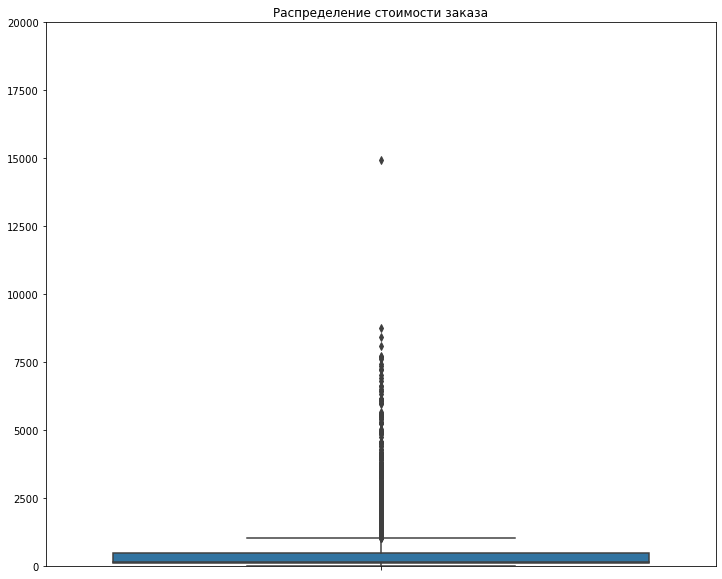

In [38]:
plt.figure(figsize=(12,10))

ax1 = sns.boxplot(y='price', data=df_without_duplicates )
ax1.set(title='Распределение стоимости заказа')

ax1.set_ylim(-5,20000)
ax1.set_xlabel('')
ax1.set_ylabel('');

Построим еще одну диаграмму размаза, что бы более четко определить медиану.

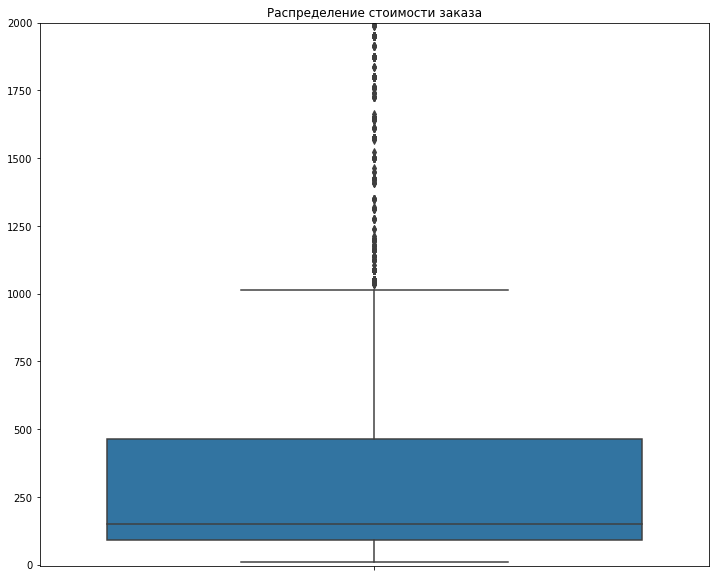

In [39]:
plt.figure(figsize=(12,10))

ax1 = sns.boxplot(y='price', data=df_without_duplicates )
ax1.set(title='Распределение стоимости заказа')

ax1.set_ylim(-5,2000)
ax1.set_xlabel('')
ax1.set_ylabel('');

По графику видно, что в основном, все заказы были менее 10.000 денежных единиц, кроме одного. Так же по графику видно, что заказы стоимость больше 1000 денежных едениц-выбросы.

Построим диаграмму размаха по количеству товаров:

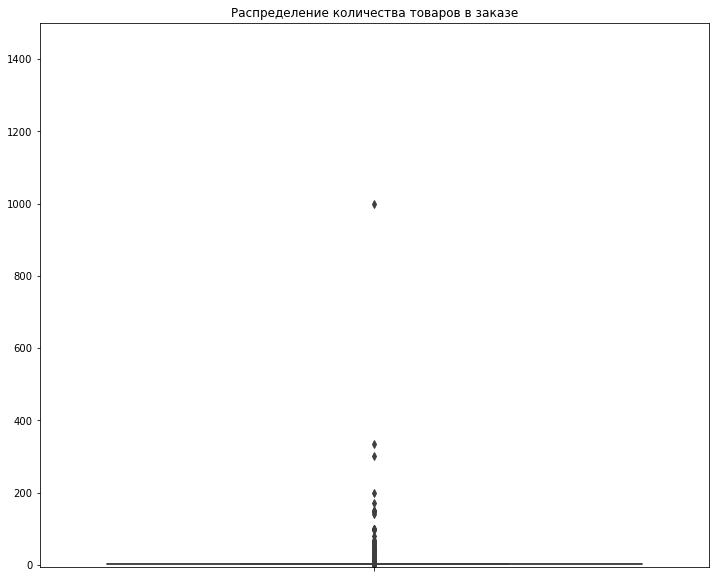

In [40]:
plt.figure(figsize=(12,10))

ax1 = sns.boxplot(y='quantity', data=df_without_duplicates )
ax1.set(title='Распределение количества товаров в заказе')

ax1.set_ylim(-5,1500)
ax1.set_xlabel('')
ax1.set_ylabel('');

Построим еще одну диаграмму размаха, в другом масштабе, для визуализации медианы:

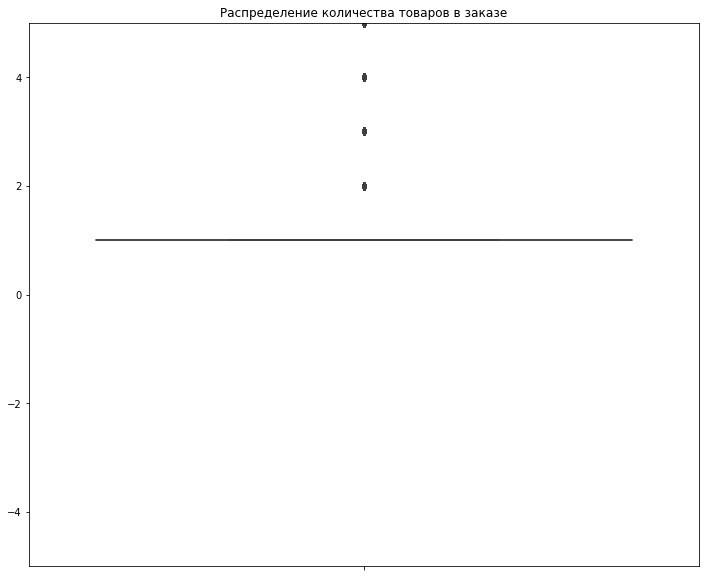

In [41]:
plt.figure(figsize=(12,10))

ax1 = sns.boxplot(y='quantity', data=df_without_duplicates )
ax1.set(title='Распределение количества товаров в заказе')

ax1.set_ylim(-5,5)
ax1.set_xlabel('')
ax1.set_ylabel('');

По графику видно, что в основном количество товаров в заказе было менее 400, кроме одного заказа с количеством заказов около 1000.

Такие выбросы искажают среднее. Ознакомимся с заказами, где количество товаров 1000, и с заказами, где стоимость заказа 14917 денежных единиц

In [42]:
df_without_duplicates[df_without_duplicates['price'] == 14917]

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
5264,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,сушилка уличная leifheit 85210 linomatic v 400...,1,14917.0,2019-07-01,17,сушилка,ванная комната


In [43]:
df_without_duplicates[df_without_duplicates['quantity'] == 1000.0]

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
4785,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"вантуз с деревянной ручкой d14 см красный, bur...",1000,675.0,2019-06-01,15,вантуз,ванная комната


Товар, со стомостью 14917 денежных единиц-сушилка уличная, в количестве 1 штука, а товар, купленный в количестве 1000 экземпляров-вантуз.

Ознакомимся с товарами "сушилка".

In [44]:
df_without_duplicates[df_without_duplicates['new_product'] == 'сушилка'].head(15)

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
11,86432d8d-b706-463b-bd5d-6a9e170daee3,68484,сушилка для белья потолочная zalger lift basic...,1,614.0,2018-10-01,12,сушилка,ванная комната
18,17213b88-1514-47a4-b8aa-ce51378ab34e,68476,"сушилка для белья напольная colombo star 18, 3679",1,1049.0,2018-10-01,18,сушилка,ванная комната
56,5f75c73a-1305-4079-b040-2bcb42085002,68509,сушилка для белья настенная zalger prima 510-7...,1,299.0,2018-10-01,18,сушилка,ванная комната
65,c971fb21-d54c-4134-938f-16b62ee86d3b,68514,сушилка для белья attribute прима 11 м синяя н...,1,749.0,2018-10-01,10,сушилка,ванная комната
70,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,сушилка для белья потолочно-настенная gimi lif...,1,1649.0,2018-10-01,11,сушилка,ванная комната
108,b463177a-cc14-44f6-a225-0e03170f5d41,68536,"сушилка для белья на батарею, сб5-45, ника",1,134.0,2018-10-01,12,сушилка,ванная комната
132,c971fb21-d54c-4134-938f-16b62ee86d3b,68563,сушилка для белья потолочная zalger lift basic...,1,614.0,2018-10-01,9,сушилка,ванная комната
133,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68564,сушилка для белья напольная gimi modular 3 lux...,1,1724.0,2018-10-01,10,сушилка,ванная комната
151,cfa03448-10b8-4538-94c9-82d53e869582,68577,сушилка для белья потолочно-настенная gimi lif...,1,1949.0,2018-10-01,20,сушилка,ванная комната
157,3bc760df-7192-4ebc-9403-21ad69060f00,68578,"сушилка для белья потолочная лиана 2,2 м 1703010",2,697.0,2018-10-01,7,сушилка,ванная комната


Посмотрим максимальную стоимость товара "сушилка":

In [45]:
max_price = df_without_duplicates[df_without_duplicates['new_product'] == 'сушилка']['price'].max()
f'Максимальная стоимость сушилки: {max_price}'

'Максимальная стоимость сушилки: 14917.0'

Посмотрим максимальное количество товара "сушилка" в одном заказе:

In [46]:
max_count = df_without_duplicates[df_without_duplicates['new_product'] == 'сушилка']['quantity'].max()
f'Максимальная стоимость сушилки: {max_count}'

'Максимальная стоимость сушилки: 10'

Посмотрим на товары "сушилка" с количеством товара 10:

In [47]:
df_without_duplicates.query('new_product == "сушилка" and quantity ==10')

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
5804,363f8d24-6d16-428f-8c89-a0fab51a5436,72892,сушилка для белья напольная ника сб3б 10 м белая,10,542.0,2019-10-01,9,сушилка,ванная комната
5836,363f8d24-6d16-428f-8c89-a0fab51a5436,72892,сушилка для белья напольная ника сб3б 10 м белая,10,542.0,2019-10-01,16,сушилка,ванная комната


Стоимость этих товаров "сушилка для" с количеством -10 едениц товара - не превышает 600 денежных едениц.


Посмотрим на товар "сушилка для" и стоимость товара 7004 денежные единицы.

In [48]:
df_without_duplicates.query('new_product == "сушилка" and price ==7004')

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category
4680,85716494-dd51-4d1d-ab28-8c74b87f14dc,71674,сушилка для белья leifheit pegasus 200 deluxe ...,1,7004.0,2019-06-01,10,сушилка,ванная комната


Ценовой сегмент среди схожих товаров не превышает 7100 днежных едениц. 


Вероятнее всего, в данные при выгрузке возникла ошибка, поэтому удалим данные о товаре "сушилка" со стоимостью 14917 денежных единиц.


Так же, ранее мы выявили оптовый закуп товаров "вантуз" в количестве 1000 единицы. Учитывая, что анализ товара проводится в рамках розничного ассортимента, исключим данную покупку из таблицы и посмотрим на данные, если исключить данные аномальные заказы из таблицы:

In [49]:
data = df_without_duplicates.query('price !=14917 and quantity!=1000.0')
data.describe()

,order_id,quantity,price,hours
count,5997.000000,5997.000000,5997.000000,5997.000000
mean,45977.180090,2.507254,492.362515,13.946807
std,27711.412908,9.772418,890.402720,4.900920
min,12624.000000,1.000000,9.000000,0.000000
25%,14784.000000,1.000000,90.000000,10.000000
50%,68735.000000,1.000000,149.000000,14.000000
75%,70725.000000,1.000000,464.000000,18.000000
max,73164.000000,334.000000,8737.000000,23.000000


#### Выводы:
    
1. В ходе исследования, было выявлено аномальное значение в столбце `price`  и в столбце `quantity`:
* товар со стомостью 14917 денежных единиц-сушилка уличная, в количестве 1 штука
* товар, купленный в количестве 1000 экземпляров-вантуз
2. Далее, после рассмотрения аналогичных товаров,было решено, что вероятнее всего, в данных ошибка, поэтому решено было удалить данные о товаре "сушилка" со стоимостью 14917 денежных единиц.
3. Так же, в ходе анализа данных выявили оптовый закуп товаров "вантуз" в количестве 1000 единицы. Учитывая, что анализ товара проводится в рамках розничного ассортимента, мы исключили данную покупку из таблицы
4. Из таблицы после исключения аномалий видно, что:
* минимальное количество товаров-1, максимальное количество товаров-334 единиц(вместо 1000)
* минимальная стоимость заказа-9 денежных едениц, максимальная стоимость заказа-8737(вместо 14917 денежных едениц); средняя сумма заказов-492(вместо 494) , а медиана-149. 

### Изучение асортимента

Изучим:

* распределение заказов по категориям и месяцам (в каких месяцах-какие категории наиболее популярны)
* категории, приносящие наибольшую выручку в каждом сезоне(что бы заранее "запастись" данными товарами перед пиком)
* в каком сезоне средний чек наибольший
* в каком сезоне средний чек наименьший(можно запустить акцию, для увеличения среднего чека)

#### Распределение заказов по категориям и месяцам

Создадим таблицу, с количеством заказов в каждом месяце по каждой категории. Для этого сначала изменим тип данных в столбце `data` на строковой тип данных

In [50]:
data['month_year'] = data['month_year'].astype('str') #изменяем тип данных
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5997 entries, 0 to 5998
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   customer_id  5997 non-null   object 
 1   order_id     5997 non-null   int64  
 2   product      5997 non-null   object 
 3   quantity     5997 non-null   int64  
 4   price        5997 non-null   float64
 5   month_year   5997 non-null   object 
 6   hours        5997 non-null   int64  
 7   new_product  5997 non-null   object 
 8   category     5997 non-null   object 
dtypes: float64(1), int64(3), object(5)
memory usage: 468.5+ KB


Тип данных в столбце изменен. Создадим таблицу:

In [51]:
category_month = data.pivot_table(index='category',
                                  columns='month_year',
                                 values='order_id',
                                 aggfunc='count')
category_month = category_month.T #транспонируем таблицу
category_month = category_month.fillna(0) #заменим пропуски на 0
category_month

category,бытовая химия,ванная комната,гардероб,для дома,кухня,сад,текстиль
month_year,,,,,,,
2018-10-01,7.0,117.0,85.0,26.0,80.0,224.0,28.0
2018-11-01,7.0,56.0,70.0,27.0,82.0,212.0,20.0
2018-12-01,7.0,57.0,89.0,35.0,67.0,89.0,22.0
2019-01-01,3.0,35.0,44.0,15.0,36.0,73.0,15.0
2019-02-01,4.0,68.0,63.0,17.0,45.0,214.0,14.0
2019-03-01,4.0,40.0,51.0,15.0,43.0,330.0,13.0
2019-04-01,1.0,43.0,56.0,25.0,22.0,595.0,17.0
2019-05-01,1.0,22.0,43.0,22.0,21.0,739.0,3.0
2019-06-01,2.0,44.0,44.0,16.0,10.0,599.0,10.0


Построим графики, что бы оценить количество заказов в каждом месяце по каждой категории

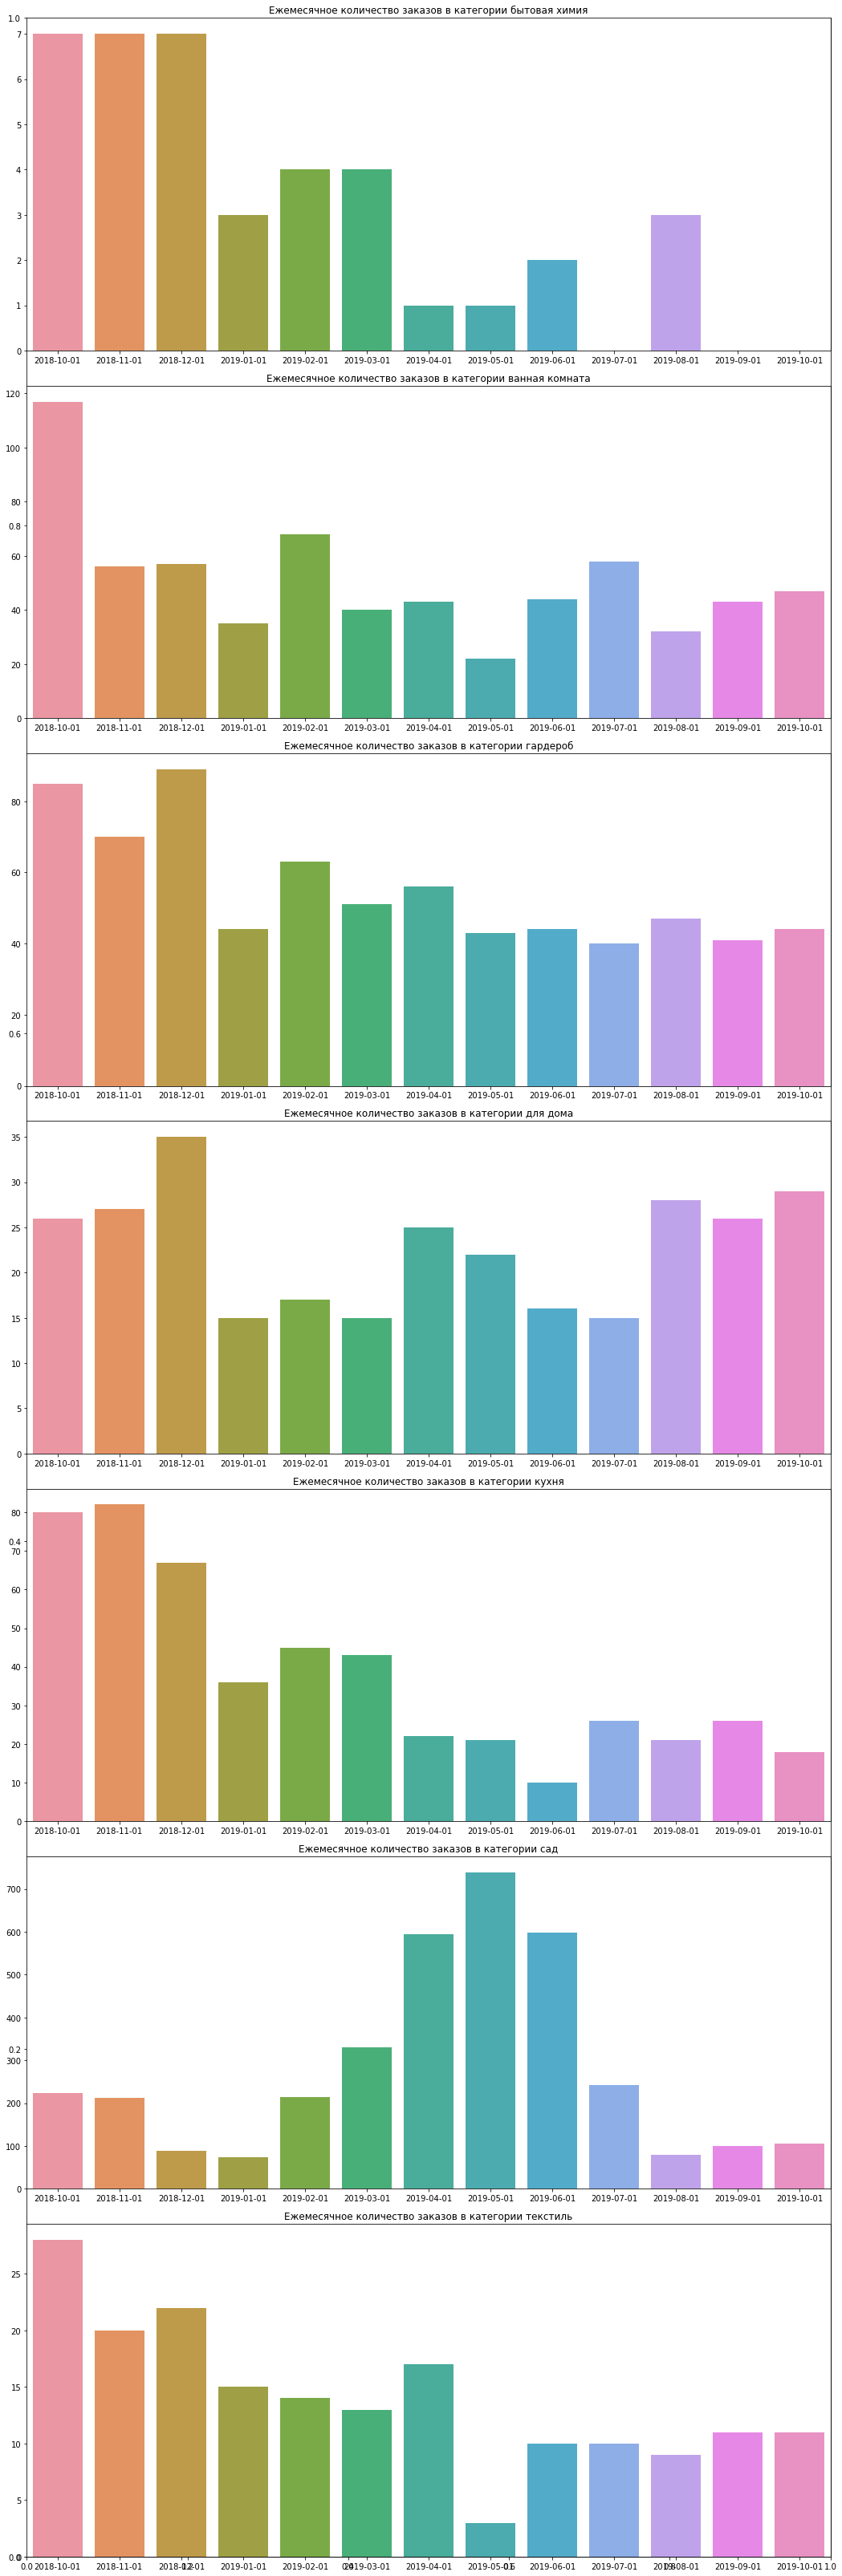

In [52]:
#напишем цикл для отрисовки графиков по количеству заказов в категории в каждом месяце 
fig, ax = plt.subplots(figsize = (15,45))

for i,col in enumerate(category_month.columns):
    ax=fig.add_subplot(7,1, i+1)
    
    sns.barplot(data=category_month,
    x = category_month.index,
    y = category_month[col].values)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('Ежемесячное количество заказов в категории ' + col)
    plt.tight_layout();

##### Выводы:
    
По графику видно, что наибольшее количество заказов в категории:
* бытовая химия - в октябре,ноябре и декабре 2018 года
* ванная комната - в октябре 2018 года 
* гардероб - в октябре,ноябре и декабре 2018 года
* для дома - в декабре 2018 года, августе, октябре 2018 и 2019 года
* кухня - в октябре,ноябре и декабре 2018 года
* сад - в апреле, мае и июне 2019 года
* текстиль - в октябре,ноябре и декабре 2018 года

#### Прибыль по категориям

Посмотрим, какая категория приносит наибольшую прибыль в целом:

In [53]:
total_month = data.pivot_table(index='category',
                                  columns='month_year',
                                 values='price',
                                 aggfunc='sum')
total_month = total_month.T #транспонируем таблицу
total_month = total_month.fillna(0) #заменим пропуски на 0
total_month

category,бытовая химия,ванная комната,гардероб,для дома,кухня,сад,текстиль
month_year,,,,,,,
2018-10-01,1089.0,81819.0,108745.0,26049.0,30580.0,38698.0,35593.0
2018-11-01,671.0,44055.0,109374.0,20448.0,18423.0,29181.0,16846.0
2018-12-01,1432.0,46622.0,143388.0,21829.0,24178.0,31899.0,34493.0
2019-01-01,987.0,28180.0,61204.0,25194.0,14649.0,12246.0,29591.0
2019-02-01,822.0,61521.0,101291.0,22323.0,23875.0,33536.0,7478.0
2019-03-01,501.0,54176.0,98621.0,17037.0,21928.0,44562.0,16052.0
2019-04-01,269.0,35964.0,90229.0,36862.0,9619.0,79324.0,17856.0
2019-05-01,142.0,15509.0,79810.0,22519.0,6962.0,83812.0,1782.0
2019-06-01,328.0,34901.0,64001.0,27399.0,3300.0,77488.0,6942.0


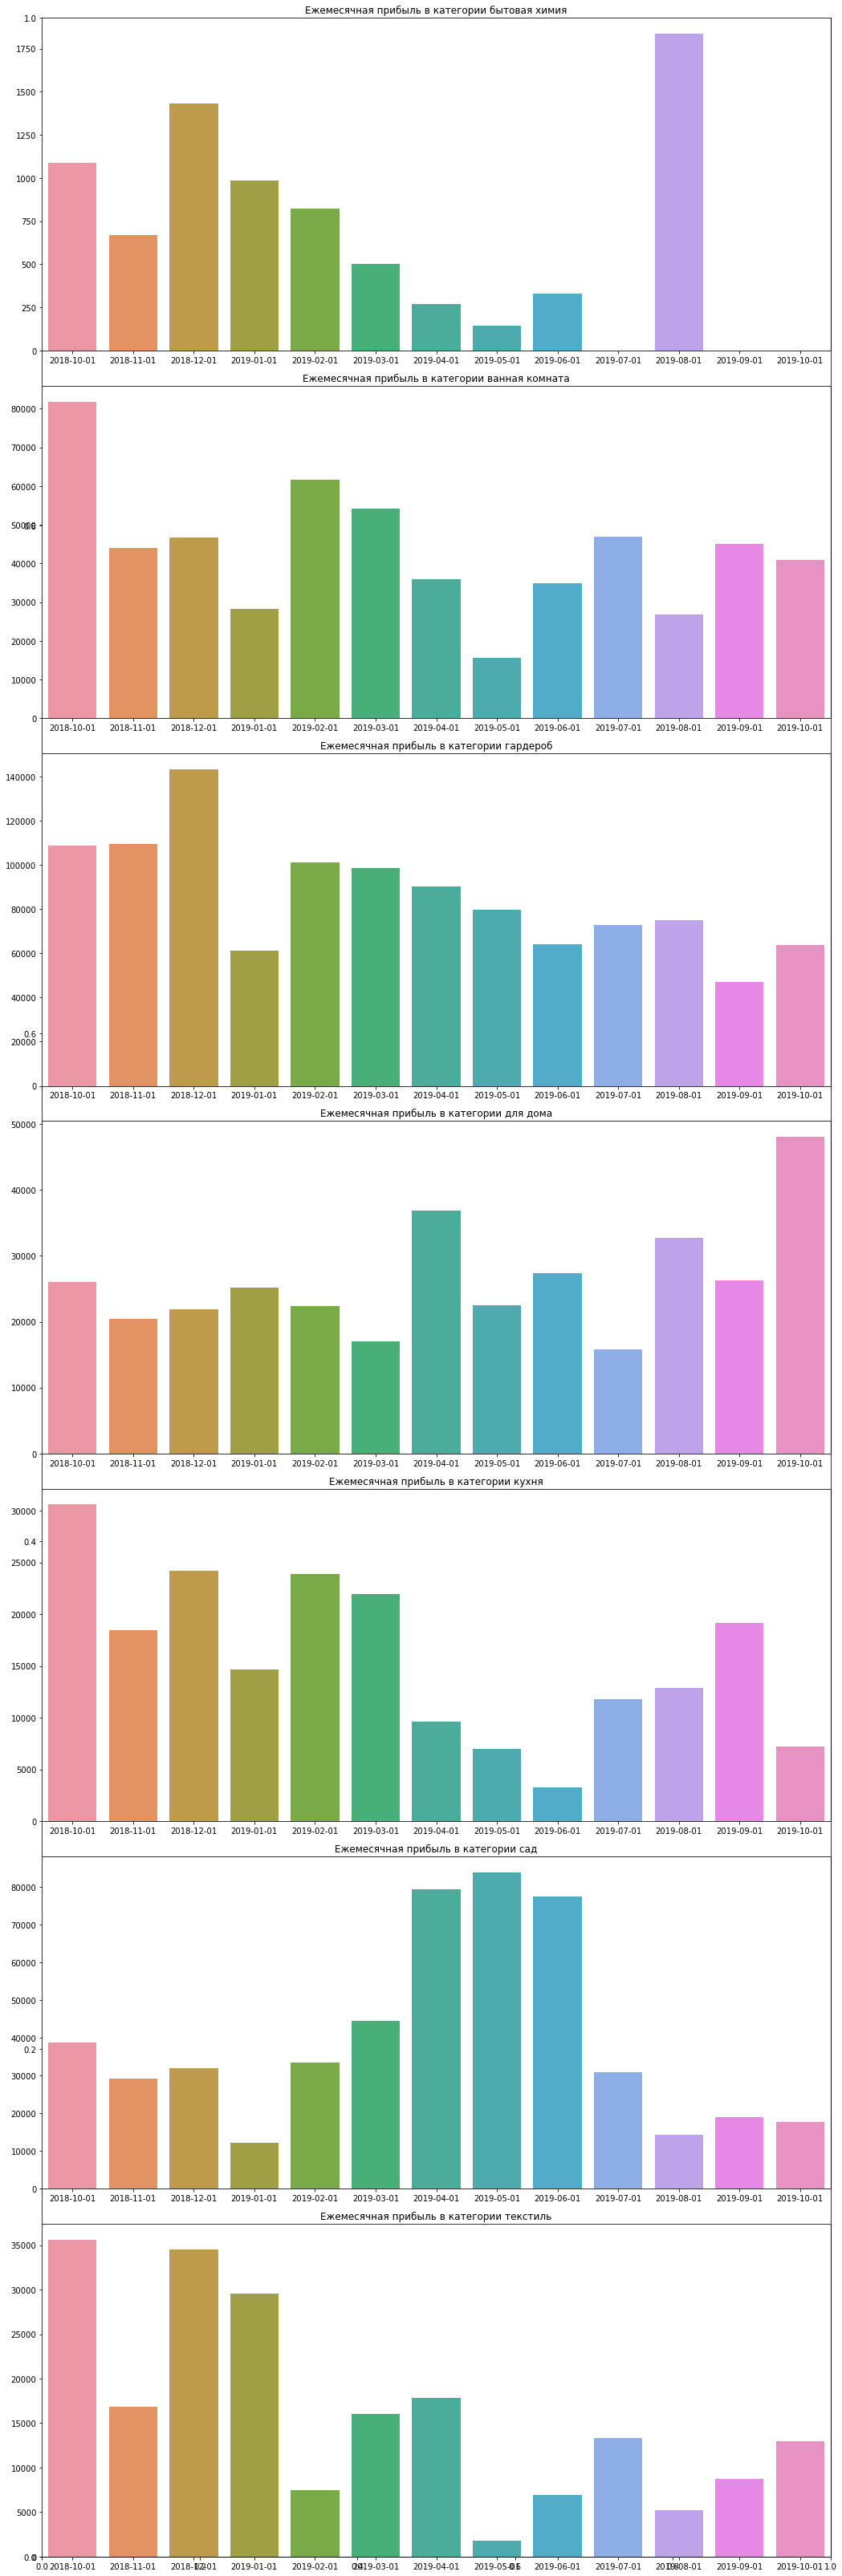

In [54]:
#напишем цикл для отрисовки графиков по количеству заказов в категории в каждом месяце 
fig, ax = plt.subplots(figsize = (15,45))

for i,col in enumerate(total_month.columns):
    ax=fig.add_subplot(7,1, i+1)
    
    sns.barplot(data=total_month,
    x = total_month.index,
    y = total_month[col].values)
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_title('Ежемесячная прибыль в категории ' + col)
    plt.tight_layout();

##### Выводы:

По графику видно, что наибольшая прибыль в категории:
* бытовая химия - в декабре 2018 года и августе 2019 года
* ванная комната - в октябре 2018 года, феврале и марте 2019 года
* гардероб - в октябре,ноябре,декабре 2018 года, феврале 2019 года
* для дома - в октябре 2019 года и апереле 2018 года
* инстурменты - в октябре, декабре 2018 года, январе,июне и октябре 2019 года
* кухня - в октябре, декабре 2018 года, феврале 2019 года
* сад - в апреле, мае и июне 2019 года
* текстиль - в октябре, декабре 2018 года и январе 2019 года

#### Наиболее прибыльные категории

Составим таблицу, где подсчитаем прибыль в каждой категории, что бы выяснить -какая категория наиболее прибыльная

In [55]:
category_best = data.pivot_table(index='category',
                                 values='price',
                                 aggfunc='sum').reset_index().sort_values(by='price', ascending=False)
category_best

,category,price
2,гардероб,1115668.0
1,ванная комната,562290.0
5,сад,512768.0
3,для дома,342467.0
6,текстиль,206838.0
4,кухня,204591.0
0,бытовая химия,8076.0


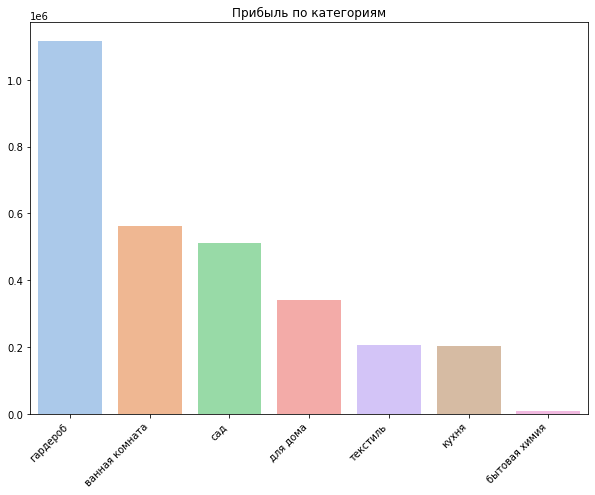

In [56]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=category_best,
                  x=category_best['category'], 
                  y=category_best['price'], palette='pastel') #изменяем палитру
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.figure.autofmt_xdate(rotation=45) #настроили поворот надписей по оси х

ax1.set_title('Прибыль по категориям');

##### Выводы:

По графику видно, что:
* наиболее прибыльная категория товаров-категория гардероб
* наименее прибыльная категория товаров-категория бытовая химия

### Количество уникальных пользователей 

Для каждого магазина важный показатель-возвращаемость покупателей. Выясним долю повторных покупок.

Сначала, выясним, сколько всего уникальных пользователей в представленных данных:

In [57]:
f"Всего уникальных пользователей: {len(data['customer_id'].unique())}"

'Всего уникальных пользователей: 2449'

####  Вывод:

В данных представленные данные о 2449 уникальных пользователях.

### Общее количество заказов каждого пользователя и среднее количество заказов на одного пользователя 

Составим таблицу, с общим количеством заказов каждого пользователя:

In [58]:
group_df = data.pivot_table(index='customer_id', values='order_id', aggfunc='count').reset_index()
group_df.head()

,customer_id,order_id
0,000d6849-084e-4d9f-ac03-37174eaf60c4,4
1,001cee7f-0b29-4716-b202-0042213ab038,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,1


Выясним, количество и долю повторных покупок среди пользователей

In [59]:
repeat_purchase_count = len(group_df[group_df['order_id'] > 1])
repeat_purchase_share = (repeat_purchase_count*100) / len(group_df)

display(f'Количество повторных покупок: {repeat_purchase_count}')
f'Доля повторных покупок: {repeat_purchase_share} %'

'Количество повторных покупок: 664'

'Доля повторных покупок: 27.113107390771745 %'

Выясним, сколько в среднем заказов приходится на пользователя:

In [60]:
f"Среднее количество заказов на пользователя: {group_df['order_id'].mean()}"

'Среднее количество заказов на пользователя: 2.448754593711719'

#### Выводы:

1. Количество повторных покупок-664
2. Доля повторных покупок: 27.1 %. Что бы увеличить данный показатель, можно "стимулировать" покупателей на повторные покупки: купонами на скидку на следующую покупку, программой лояльности с накопительной скидочной системой.
3. Среднее количество заказов на пользователя: 2.4. Для увеличения данного показателя так же можно проводить маркетинговые компании (возьми второй продукт, но со скидкой)

### Анализ заказов

#### Количество заказов по месяцам

Расчитаем количество покупок за каждый месяц:

In [61]:
month_orders = data.query("month_year != '2018-10-01'").pivot_table(
    index='month_year', 
    values='order_id', 
    aggfunc='count').reset_index()
month_orders.head()

,month_year,order_id
0,2018-11-01,474
1,2018-12-01,366
2,2019-01-01,221
3,2019-02-01,425
4,2019-03-01,496


Построим график для визуализации количества покупок за каждый месяц:

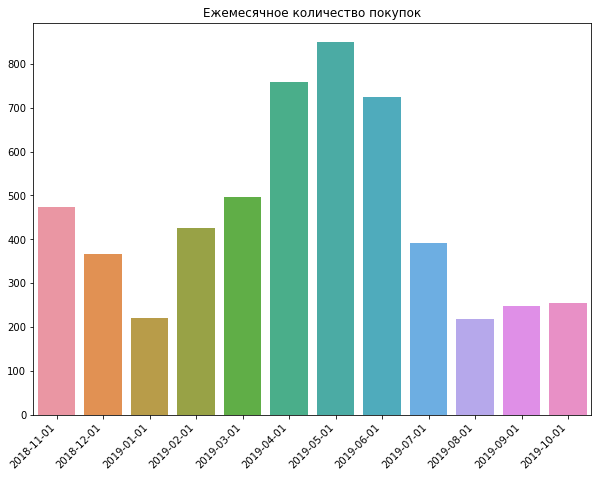

In [62]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=month_orders,
                  x=month_orders['month_year'].astype('datetime64[M]').dt.date, 
                  y=month_orders['order_id'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.figure.autofmt_xdate(rotation=45) 

ax1.set_title('Ежемесячное количество покупок');

##### Выводы:

По графику видно, что:
* наибольшее количество покупок приходится на период с апреля по июнь 2019 года


Вероятнее всего, такой спрос в весенне-летний период связан с дачным сезоном, ведь в интернет магазине большой выбор товаров для садоводства, а так же инструментов.


* наименьшее количество покупок приходится на январь и август 2019 года 

это так же носит сезонный характер, после нового года наступают новогодние каникулы, в которые многие отдыхают, а не занимаются шопингом. Так же как и в августе, большинство пользователей закупаются канцелярией, а так же одеждой и обувью перед началом учебного года. 

Возможно, следует провести маркетинговую компанию в эти месяца, для привлечения пользователей и количества покупок и выручки, а так же усилить работу доставки

#### Прибыль по месяцам

Построим таблицу, с суммарной прибылью по месяцам

In [63]:
month_sum = data.pivot_table(index='month_year',
                                 values='price',
                                 aggfunc='sum').reset_index()
month_sum

,month_year,price
0,2018-10-01,322573.0
1,2018-11-01,238998.0
2,2018-12-01,303841.0
3,2019-01-01,172051.0
4,2019-02-01,250846.0
5,2019-03-01,252877.0
6,2019-04-01,270123.0
7,2019-05-01,210536.0
8,2019-06-01,214359.0
9,2019-07-01,191593.0


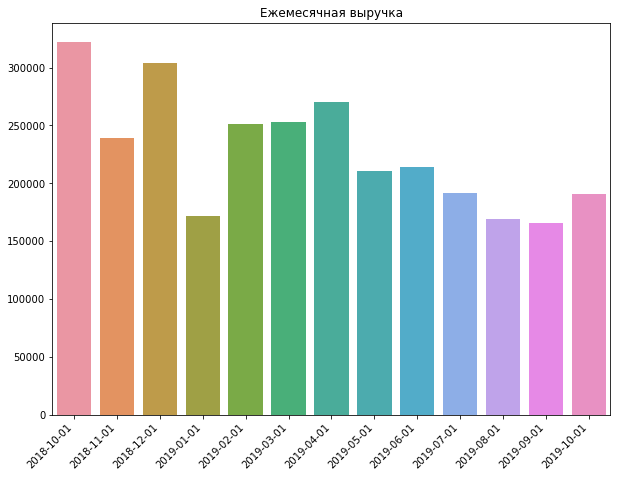

In [64]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=month_sum,
                  x=month_sum['month_year'].astype('datetime64[M]').dt.date, 
                  y=month_sum['price'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.figure.autofmt_xdate(rotation=45) 

ax1.set_title('Ежемесячная выручка');

##### Выводы:

По графику видно, что прибыль:
* наибольшая в октябре 2018 года, а так же декабре 2018 и апреле 2019 года
* наименьшая прибыль в сентябре, а так же январе и августе

Возможно, следует проводить  маркетинговую компанию(акции) в месяца с наименьшей прибылью, для привлечения пользователей и  увеличения выручки.

#### Средний чек по месяцам

Посмотрим на средний чек по сезонам (средний чек-это отноешние суммы покупок к количеству заказов). 

Для этого сформируем таблицу с суммой заказов по месяцам.

In [65]:
mean_price = data.pivot_table(index='month_year',
                             values='price',
                             aggfunc='sum').reset_index()
mean_price

,month_year,price
0,2018-10-01,322573.0
1,2018-11-01,238998.0
2,2018-12-01,303841.0
3,2019-01-01,172051.0
4,2019-02-01,250846.0
5,2019-03-01,252877.0
6,2019-04-01,270123.0
7,2019-05-01,210536.0
8,2019-06-01,214359.0
9,2019-07-01,191593.0


Далее создадим таблицу, с количеством покупок по месяцам

In [66]:
count_price = data.pivot_table(index='month_year',
                             values='order_id',
                             aggfunc='count').reset_index()
count_price = count_price.rename(columns={'month_year' : 'month_year2'})
count_price

,month_year2,order_id
0,2018-10-01,567
1,2018-11-01,474
2,2018-12-01,366
3,2019-01-01,221
4,2019-02-01,425
5,2019-03-01,496
6,2019-04-01,759
7,2019-05-01,851
8,2019-06-01,725
9,2019-07-01,391


Объеденим обе таблицы и удалим "задвоившейся" столюец с месяцами, а так же разделим сумму по месяца на количество покупок по месяцам.

In [67]:
mean_count_price = pd.concat([mean_price, count_price], axis=1)
mean_count_price = mean_count_price[['month_year', 'price', 'order_id']]
mean_count_price['avg_bill'] = mean_count_price['price']/mean_count_price['order_id']
mean_count_price

,month_year,price,order_id,avg_bill
0,2018-10-01,322573.0,567,568.911817
1,2018-11-01,238998.0,474,504.215190
2,2018-12-01,303841.0,366,830.166667
3,2019-01-01,172051.0,221,778.511312
4,2019-02-01,250846.0,425,590.225882
5,2019-03-01,252877.0,496,509.832661
6,2019-04-01,270123.0,759,355.893281
7,2019-05-01,210536.0,851,247.398355
8,2019-06-01,214359.0,725,295.667586
9,2019-07-01,191593.0,391,490.007673


Построим график среднего чека по месяцам

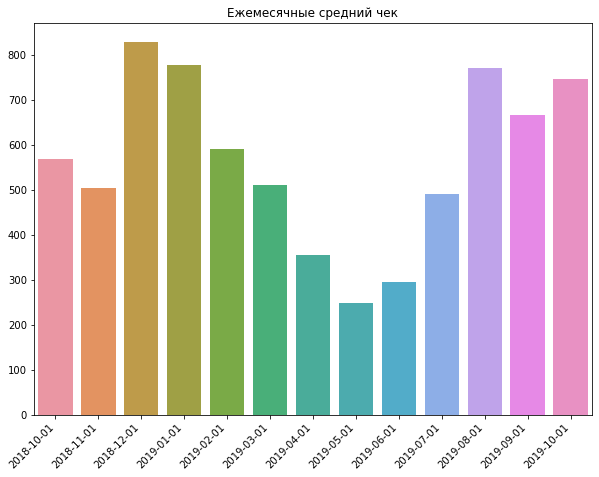

In [68]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=mean_count_price,
                  x=mean_count_price['month_year'].astype('datetime64[M]').dt.date, 
                  y=mean_count_price['avg_bill'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.figure.autofmt_xdate(rotation=45) 

ax1.set_title('Ежемесячные средний чек');

##### Выводы:

По графику видно, что:
1. Наибольший средний чек в декабре 2018 года(2018-12-01). Вероятнее всего, это связано с новым годом. Так же большой средний чек (по сравнению с остальными месяцами) в январе 2019 года, в августе 2019 года и октябре 2019 года.

Так же отметим, что средний чек в октябре увеличился с 2018 по 2019 год. Возможно, в 2019 года был расширен ассортимент или проводилась маркетинговая компания, которая хорошая себя показала.

2. Наименьший средний чек в мае 2019 года, а так же июне 2019 года.Вероятнее всего, многие потенциальные покупатели уезжают в отпуск, на дачу и  реже пользуются интернет-магазином. В данный период можно запустить акцию (маркетинговую компанию), для увеличения среднего чека и привлечения покупателей

3. Наибольший средний чек по сезонам:
* зимой-в декабре (вероятнее всего, влияние новго года)
* весной-в марте 
* летом-в августе
* осенью-в октябре 2019

4. Наименьший средний чек по сезонам:
* зимой-в феврале
* весной-в мае 
* летом-в июне
* осенью-в октябре 2018

### Количество заказов по часам

Расчитаем количество покупок по часам:

In [69]:
hours_orders = data.pivot_table(index='hours', 
                                values='order_id', 
                                aggfunc='count').reset_index()
hours_orders.head()

,hours,order_id
0,0,70
1,1,44
2,2,18
3,3,10
4,4,28


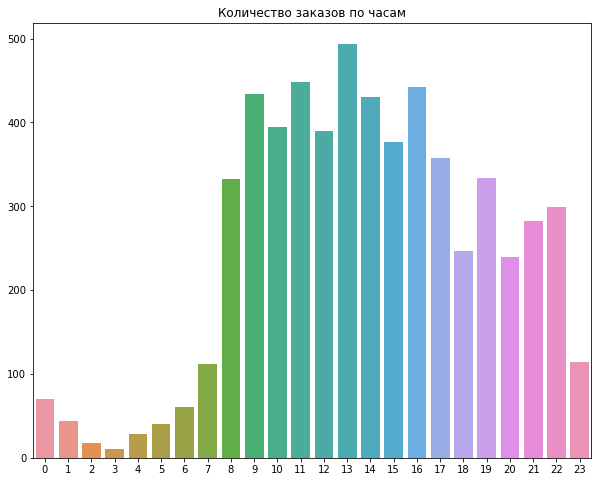

In [70]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=hours_orders,
                  x=hours_orders['hours'], 
                  y=hours_orders['order_id'])
ax1.set_xlabel('')
ax1.set_ylabel('')

ax1.set_title('Количество заказов по часам');

#### Выводы:

По графику видно, что пользователи:
* чаще всего заказывают в промежутке времени с 8:00 до 22:00. 
* наименьшую активность пользователи проявляют с 02:00 до 04:00

### Прибыль по часам

Посмотрим, как отличается прибыль пользователей по часам

In [71]:
hours_sum = data.pivot_table(index='hours', 
                                values='price', 
                                aggfunc='sum').reset_index()
hours_sum.head()

,hours,price
0,0,34145.0
1,1,21702.0
2,2,22434.0
3,3,12413.0
4,4,14116.0


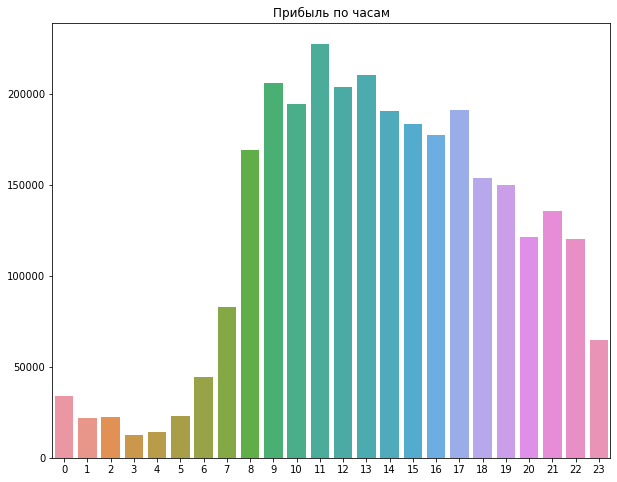

In [72]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=hours_sum,
                  x=hours_sum['hours'], 
                  y=hours_sum['price'])
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Прибыль по часам');

##### Выводы:

По графику видно, что прибыль:
* больше всего в промежутке времени с 8:00 до 22:00. 
* наименьшая прибыль в промежутке с 03:00 до 04:00.

Таким образом, по графику можно сделать предположение, что прибыль в ночные часы меньше (с 20:00 до 8:00), чем в дневные. 

Возможно, следует проводить ночные распродажи, для увеличения прибыль в ночные часы

#### Анализ прибыли дневное/ночное время

Рассмотрим прибыль в дневное время,  и в ночное. За ночное время суток примем промежуток времени с 20:00 по 8:00.

Для этого список `night`, где укажем какие часы относятся к ночным:

In [73]:
night = [20,21,22,23,0,1,2,3,4,5,6,7,8]

Напишем функция, которая присвоит время суток покупке в зависимости от часа покупки

In [74]:
def day(hours):
    if hours in night:
        return 'ночь'
    if hours not in night:
        return 'день'
    else:
        return 'неизвестно'

Проверим функцию:

In [75]:
display(day(20))
day(10)

'ночь'

'день'

Функция работает исправно, применим ее к таблице

In [76]:
data['day'] = data['hours'].apply(day)
data.head()

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category,day
0,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке алое вера, d12, h30",1,142.0,2018-10-01,0,комнатное,сад,ночь
1,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"комнатное растение в горшке кофе арабика, d12,...",1,194.0,2018-10-01,0,комнатное,сад,ночь
2,ee47d746-6d2f-4d3c-9622-c31412542920,68477,радермахера d-12 см h-20 см,1,112.0,2018-10-01,0,радермахера,сад,ночь
3,ee47d746-6d2f-4d3c-9622-c31412542920,68477,хризолидокарпус лутесценс d-9 см,1,179.0,2018-10-01,0,хризолидокарпус,сад,ночь
4,ee47d746-6d2f-4d3c-9622-c31412542920,68477,циперус зумула d-12 см h-25 см,1,112.0,2018-10-01,0,циперус,сад,ночь


Время суток присвоено, теперь проверим, есть ли покупки, которые не получили врем ясуток:

In [77]:
data[data['day']=='неизвестно']

,customer_id,order_id,product,quantity,price,month_year,hours,new_product,category,day


In [78]:
data['day'].value_counts()#уникальные значения столбца

день    4348
ночь    1649
Name: day, dtype: int64

Все покупки получили время суток. Проверим, отличается ли выручка по времени суток

In [79]:
day_sum = data.pivot_table(index='day', 
                                values='price', 
                                aggfunc='sum').reset_index()
day_sum.head()

,day,price
0,день,2087566.0
1,ночь,865132.0


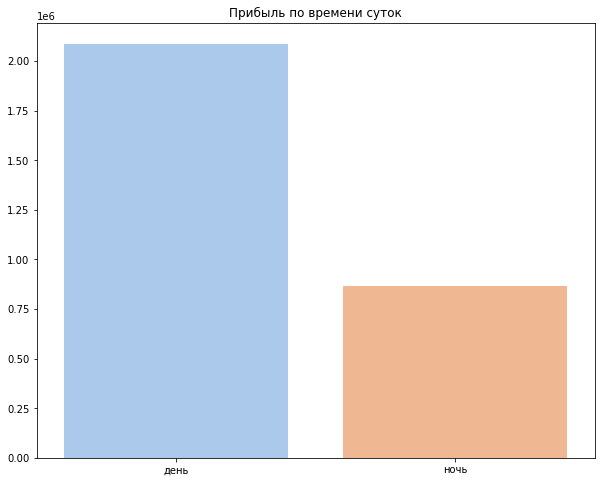

In [80]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=day_sum,
                  x=day_sum['day'], 
                  y=day_sum['price'], palette='pastel')
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_title('Прибыль по времени суток');

##### Выводы:

По графику видно, что:
* прибыль в дневное время больше (с 8:00 до 20:00), чем в ночное 

Далее, проверим: является ли данное различие в прибыли статистически значимым или нет.

### Анализ количества заказов день/ночь

Составим таблицу, где будет количество заказов днем и ночью

In [81]:
day_orders = data.pivot_table(index='day', 
                                values='order_id', 
                                aggfunc='count').reset_index()
day_orders.head()


,day,order_id
0,день,4348
1,ночь,1649


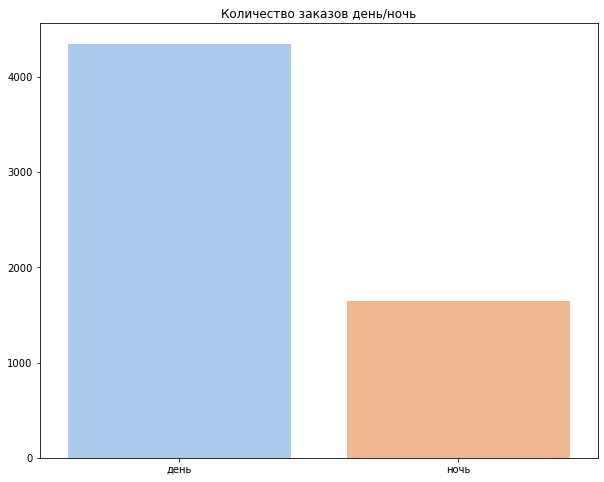

In [82]:
plt.figure(figsize=(10,8))

ax1 = sns.barplot(data=day_orders,
                  x=day_orders['day'], 
                  y=day_orders['order_id'], palette='pastel')
ax1.set_xlabel('')
ax1.set_ylabel('')

ax1.set_title('Количество заказов день/ночь');

#### Выводы:

По графику видно, что:
* количество заказов в дневное время больше (с 8:00 до 20:00), чем в ночное время  

Далее, проверим: является ли данное различие в количестве заказов статистически значимым или нет.

## Формулировка статистических гипотез

Исходя из проведенного анализа, мы сформурировали следующие предположения: 
* прибыль в ночное время (20:00-8:00) отличается от прибыли в дневное время
* прибыль в категории гардероб отличается от прибыли в других категориях

Проверим наши гипотезы

## Проверка статичстических гипотез

### Гипотеза № 1 

* Н0: нет статистически значимой разницы между средней прибылью в ночное время и дневное время, то есть в ночное время средняя прибыль такая же, как в дневное
* Н1: есть статистически значимая разница средней прибыли в ночное время и дневное время, то есть средняя прибыль в дневное время не такая же, как в ночное время 

In [83]:
alpha = .05

results = st.ttest_ind(data.query('day =="день"')['price'], data.query('day =="ночь"')['price'])
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 0.08384056882134695
Не удалось отвергнуть нулевую гипотезу


#### Выводы

В ходе проверки гипотезы № 1 - не удалось отвергнуть нулевую гипотезу.

Таким образом, нет статистически значимой разницы между средней прибылью в ночное время и дневное время, то есть в ночное время средняя прибыль такая же, как в дневное. 

### Гипотеза № 2 

* Н0: нет статистически значимой разницы между средним количестом заказов в дневное время и ночное время, то есть количество заказов в дневное и ночное время одинаковое 
* Н1: есть статистически значимая разница между средним количестом заказов в дневное время и ночное время, то есть количество заказов в дневное и ночное время разное 

In [84]:
alpha = .05

results = st.ttest_ind(data.query('day =="день"')['order_id'], data.query('day =="ночь"')['order_id'])
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 0.00011355354951749238
Отвергаем нулевую гипотезу


#### Выводы

В ходе проверки гипотезы № 2 - отвергаем нулевую гипотезу.

Таким образом, есть значимая разница между средним количестом заказов в дневное время и ночное время, то есть количество заказов в дневное и ночное время разное

### Гипотеза № 3

* Н0: нет статистически значимой разницы между средней прибылью в категории гардероб и другими категориями, то есть прибыль в категориях гардероб и других категориях одинаковая 
* Н1: есть статистически значимая разница между прибылью в категории гардероб и другими категориями, то есть прибыль в категории гардероб отличается от прибыли в других категориях

In [85]:
alpha = .05

results = st.ttest_ind(data.query('category =="гардероб"')['price'], data.query('category !="гардероб"')['price'])
print('Значение p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Значение p-value: 8.036391577960551e-283
Отвергаем нулевую гипотезу


#### Выводы

В ходе проверки гипотезы № 3 - отвергаем нулевую гипотезу.

Таким образом, есть статистически значимая разница между прибылью в категории гардероб и другими категориями, то есть прибыль в категории гардероб отличается от прибыли в других категориях

## Выводы

В ходе исследования были выполнены следующие задачи:

1. В столбце date, где указана дата заказа изменен тип данных (с int64 на datetime)
2. Данные были проверены на пропуски (пропусков нет)
3. Создан доп.столбецы в таблице, где указаны только месяц, и только часы заказа
4. Данные были проверкны на дубликаты, дубликаты были удалены
5. Была проведена кластеризация, в результате которой установлено число категорий-7 категорий
6. Проведена категоризация столбца с наименованиями товаров, каждый товар отнесен в определнную категорию
7. Был определен период анализа данных (01.10.2018-01.10.2019 гг)
8. Выявление и удаление аномалий


9. Для каждой категории установлен месяц с наибольшим количеством заказов в категории:
* бытовая химия - в октябре,ноябре и декабре 2018 года
* ванная комната - в октябре 2018 года
* гардероб - в октябре,ноябре и декабре 2018 года
* для дома - в декабре 2018 года, августе, октябре 2018 и 2019 года
* кухня - в октябре,ноябре и декабре 2018 года
* сад - в апреле, мае и июне 2019 года
* текстиль - в октябре,ноябре и декабре 2018 года


10. Для каждой категории установлены месяца с наибольшей прибылью в категории:
* бытовая химия - в декабре 2018 года и августе 2019 года
* ванная комната - в октябре 2018 года, феврале и марте 2019 года
* гардероб - в октябре,ноябре,декабре 2018 года, феврале 2019 года
* для дома - в октябре 2019 года и апереле 2018 года
* инстурменты - в октябре, декабре 2018 года, январе,июне и октябре 2019 года
* кухня - в октябре, декабре 2018 года, феврале 2019 года
* сад - в апреле, мае и июне 2019 года
* текстиль - в октябре, декабре 2018 года и январе 2019 года

11. Была выявлена:
* наиболее прибыльная категория-гардероб
* наименее прибыльная категория-бытовая химия

12. Установлено количество уникальных пользователей (2449 пользователя)
13. Выявлено количество повторных покупок-664
14. Выявлена доля повторных покупок: 27.1 %. Что бы увеличить данный показатель, можно "стимулировать" покупателей на повторные покупки: купонами на скидку на следующую покупку, программой лояльности с накопительной скидочной системой.
15. Определено среднее количество заказов на пользователя: 2.4
16. Установлено, что наибольшее количество покупок приходится на период с апреля по июнь 2019 года
17. Установлено, что наименьшее количество покупок приходится на январь и август 2019 года 
18. Определены месяца с наибольшей и наименьшей прибылью:
* наибольшая в октябре 2018 года, а так же декабре 2018 и апреле 2019 года
* наименьшая прибыль в сентябре, а так же январе и августе
19. Установлено, что:
* чаще всего заказывают в промежутке времени с 8:00 до 22:00.
* наименьшую активность пользователи проявляют с 02:00 до 04:00
20. Выяснено, что прибыль по часам:
* больше всего в промежутке времени с 8:00 до 22:00.
* наименьшая прибыль в промежутке с 03:00 до 04:00.

21. Проведена проверка гипотез и получены следующие результаты:


* Гипотеза № 1-результат:нет статистически значимой разницы между средней прибылью в ночное время и дневное время, то есть в ночное время средняя прибыль такая же, как в дневное


* Гипотеза № 2-результат:есть значимая разница между средним количестом заказов в дневное время и ночное время, то есть количество заказов в дневное и ночное время разное

* Гипотеза № 3-результат:есть статистически значимая разница между прибылью в категории гардероб и другими категориями, то есть прибыль в категории гардероб отличается от прибыли в других категориях

## Рекомедации

1. Рекомендуется пополнять ассортимент соответствующим товаром перед месяцами с наибольшей прибылью в категории:
* бытовая химия - в декабре 2018 года и августе 2019 года
* ванная комната - в октябре 2018 года, феврале и марте 2019 года
* гардероб - в октябре,ноябре,декабре 2018 года, феврале 2019 года
* для дома - в октябре 2019 года и апереле 2018 года
* инстурменты - в октябре, декабре 2018 года, январе,июне и октябре 2019 года
* кухня - в октябре, декабре 2018 года, феврале 2019 года
* сад - в апреле, мае и июне 2019 года
* текстиль - в октябре, декабре 2018 года и январе 2019 года

2. Что бы увеличить долю повторных покупок, можно "стимулировать" покупателей на повторные покупки: купонами на скидку на следующую покупку, программой лояльности с накопительной скидочной системой.


3. Для увеличения среднего количества заказов так же можно проводить маркетинговые компании (возьми второй продукт, но со скидкой)

4. Рекомендовано пополнить ассортимент перед месяцами с наибольшим количеством заказов (апреля по июнь), а так же усилить службу доставки

5. Рекомендовано рассмотреть проведение маркетинговую компанию (акций) в месяца с наименьшим количеством покупок, для привлечения пользователей, увеличения количества покупок и выручки (январь и август)

6. Возможно, следует проводить ночные распродажи, для увеличения прибыль в ночные часы